# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}"

cit = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

print("Begining data retrieval")
print("-----------------------")

for city in cities:
    try:
        response = requests.get(f"{query_url}&q={city}&units=imperial").json()
        cit.append(response['name'])
        print(f"Processing {len(cit)} of {len(cities)}: {city}")
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except:
        print("Error, skipping")
print(f"Processed {len(cit)}")

Begining data retrieval
-----------------------
Processing : busselton
Processing : hermanus
Processing : hermiston
Processing : cabedelo
Processing : kruisfontein
Processing : cidreira
Processing : tuktoyaktuk
Processing : vostok
Processing : ushuaia
Processing : mataura
Processing : rikitea
Processing : zeerust
Processing : khatanga
Processing : marcona
Error, skipping
Processing : punta arenas
Processing : souillac
Processing : illoqqortoormiut
Error, skipping
Processing : hithadhoo
Processing : storslett
Processing : port hardy
Processing : panama city
Processing : richards bay
Processing : laiwu
Processing : sedelnikovo
Error, skipping
Processing : tayzhina
Processing : nizhneyansk
Error, skipping
Processing : kapaa
Processing : qaanaaq
Processing : makakilo city
Processing : thompson
Processing : kaeo
Processing : marsaxlokk
Processing : erenhot
Processing : bredasdorp
Processing : kavieng
Processing : taolanaro
Error, skipping
Processing : cedar city
Processing : lebu
Processing

Processing : morgan city
Processing : muscat
Processing : toba
Processing : kurilsk
Processing : burlatskoye
Processing : lorengau
Processing : jiuquan
Processing : andilamena
Processing : conneaut
Processing : kaitangata
Processing : vestmannaeyjar
Processing : gamba
Processing : onega
Processing : husavik
Processing : centralia
Processing : tiarei
Processing : priiskovyy
Processing : leutkirch
Processing : yellowknife
Processing : matay
Processing : nueve de julio
Processing : manokwari
Processing : wuzhou
Processing : lunino
Processing : avera
Processing : ust-nera
Processing : evensk
Processing : ramanuj ganj
Processing : kiama
Processing : kamaishi
Processing : mount isa
Processing : sarangani
Processing : bonthe
Processing : bima
Processing : cravo norte
Processing : montepuez
Processing : ulkan
Processing : basco
Processing : berlevag
Processing : pangnirtung
Processing : leh
Processing : zhanatas
Error, skipping
Processing : moose factory
Processing : dubti
Processing : chaohu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City" : cit,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitude" : lat,
    "Longitude" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("Output/weather.csv")
weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Busselton,1,AU,1571617922,47,-33.64,115.35,68.00,4.27
1,Hermanus,84,ZA,1571617923,84,-34.42,19.24,55.99,1.99
2,Hermiston,90,US,1571617923,54,45.84,-119.29,57.20,9.17
3,Cabedelo,0,BR,1571617923,88,-6.97,-34.84,75.20,4.70
4,Kruisfontein,89,ZA,1571617924,89,-34.00,24.73,55.92,7.16
...,...,...,...,...,...,...,...,...,...
555,Biltine,81,TD,1571618111,56,14.53,20.93,83.37,4.25
556,Porto Velho,40,BR,1571618111,94,-8.75,-63.87,77.00,1.12
557,Ormara,0,PK,1571618112,44,25.21,64.64,75.00,2.42
558,Iquitos,75,PE,1571618112,88,-3.75,-73.25,78.80,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

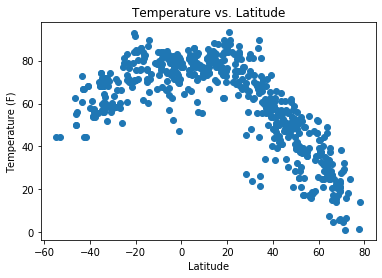

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o")
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Output/lat_vs_temp.png")

#### Latitude vs. Humidity Plot

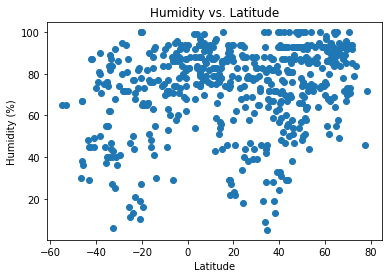

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output/lat_vs_humid.png")

#### Latitude vs. Cloudiness Plot

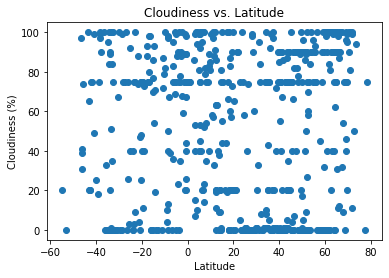

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output/lat_vs_cloudy.png")

#### Latitude vs. Wind Speed Plot

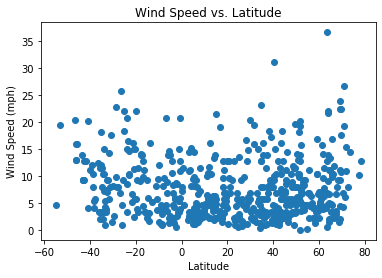

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output/lat_vs_windmph.png")